Degue Outbreak in Tainan, 2015
===

In [1]:
%matplotlib inline


Data Sources
---
<a href="http://data.tainan.gov.tw/dataset/dengue-dist">Tainan City Government</a>

In [3]:
data_file = open('data/0908.csv')
 
for index, line in enumerate(data_file.readlines()):
    print ((line.split(',')))
    if index == 1:
        break

['編號', '確診日', '區別', '里別', '道路名稱', '緯度座標', '經度座標\n']
['1', '2015/1/6', '關廟區', '南花里', '明德街', '22.987', '120.234\n']


After read in the data, we find the data not in *ascii* code (in Python-2.7 but normal in Python-3.4). Try to read again by "Pandas.read_csv":

In [4]:
import pandas as pd
data = pd.read_csv('data/0908.csv', nrows=5)
data.columns

Index(['編號', '確診日', '區別', '里別', '道路名稱', '緯度座標', '經度座標'], dtype='object')

Also readble by "numpy.genfromtxt"

```python
from numpy import genfromtxt
data_file = genfromtxt('data/0908.csv', delimiter=',')
```

Subjects
---

- predict what the future migtht be;
- make the scater plot for infected in local area.


In [5]:
df = pd.DataFrame.from_csv('data/0908.csv',index_col=1)
#df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5263 entries, 2015-01-06 to 2015-09-06
Data columns (total 6 columns):
編號      5263 non-null int64
區別      5263 non-null object
里別      5263 non-null object
道路名稱    5216 non-null object
緯度座標    5263 non-null float64
經度座標    5263 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 287.8+ KB


The "index" column is in Traditional Chinese; change the chinese name of items into English ones for convenient in the future.

In [6]:
df = pd.DataFrame.from_csv('data/0908-en.csv',index_col=0,parse_dates=[0])
#df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5263 entries, 1 to 5263
Data columns (total 6 columns):
date         5263 non-null object
district     5263 non-null object
alley        5263 non-null object
street       5216 non-null object
longitude    5263 non-null float64
latitude     5263 non-null float64
dtypes: float64(2), object(4)
memory usage: 287.8+ KB


In [6]:
df.describe()

,longitude,latitude
count,5263.000000,5263.000000
mean,23.011662,120.211114
std,0.048532,0.028581
min,22.906372,120.099911
25%,22.992000,120.194000
50%,23.006000,120.208053
75%,23.017000,120.219000
max,23.398983,120.538000


In [11]:
df.head(),df.tail()

(            date district alley street  longitude  latitude
 index                                                      
 1       2015/1/6      關廟區   南花里    明德街     22.987   120.234
 2      2015/1/19       東區   文聖里    裕文路     22.979   120.197
 3      2015/5/21       北區   六甲里    和緯路     22.997   120.198
 4      2015/5/24       北區   六甲里    和緯路     22.997   120.198
 5       2015/6/4       北區   六甲里    和緯路     23.005   120.209,
            date district alley street  longitude  latitude
 index                                                     
 5259   2015/9/6       北區   國興里    南園街     23.009   120.225
 5260   2015/9/6      中西區   民主里    府前路     22.991   120.194
 5261   2015/9/6      中西區   安海里    環河街     22.996   120.193
 5262   2015/9/6       南區   金華里    尊南街     22.979   120.189
 5263   2015/9/6       北區   東興里    小東路     22.999   120.228)

Before we continue, let's change the "date" data into pandas's format and add the count number for each data.

In [7]:
df['date']=pd.to_datetime(df['date'])

In [8]:
df['num']=1

In [9]:
cases=df[['date','num']]
cases.tail()

,date,num
index,,
5259,2015-09-06,1
5260,2015-09-06,1
5261,2015-09-06,1
5262,2015-09-06,1
5263,2015-09-06,1


Sum up the numbers of cases in the same days:
--

In [10]:
cases_group = cases.groupby('date')
cases_group.size()

date
2015-01-06      1
2015-01-19      1
2015-05-21      1
2015-05-24      1
2015-06-04      1
2015-06-11      1
2015-06-14      1
2015-06-18      1
2015-06-21      1
2015-06-22      1
2015-06-23      1
2015-06-24      1
2015-06-26      2
2015-06-29      1
2015-07-01      2
2015-07-03      2
2015-07-04      2
2015-07-05      3
2015-07-06      1
2015-07-07      2
2015-07-08      1
2015-07-10      1
2015-07-11      3
2015-07-12      5
2015-07-13      4
2015-07-14      3
2015-07-15      3
2015-07-16      6
2015-07-17      6
2015-07-18      4
             ... 
2015-08-07     57
2015-08-09     30
2015-08-10     96
2015-08-11     55
2015-08-12     51
2015-08-13     62
2015-08-14     65
2015-08-15     67
2015-08-16     62
2015-08-17     67
2015-08-18    130
2015-08-19    112
2015-08-20    127
2015-08-21    190
2015-08-22    111
2015-08-23    147
2015-08-24    166
2015-08-25    180
2015-08-26    227
2015-08-27    193
2015-08-28    126
2015-08-29    167
2015-08-30    137
2015-08-31    232
2015-

In [11]:
cases_totals = cases_group.sum()
#cases_totals.sort(columns='num').head()
cases_totals.tail()

,num
date,
2015-09-02,319
2015-09-03,290
2015-09-04,471
2015-09-05,298
2015-09-06,369


Make the first observation
---

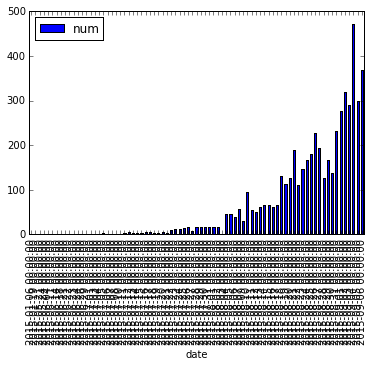

In [12]:
my_plot = cases_totals.plot(kind='bar')

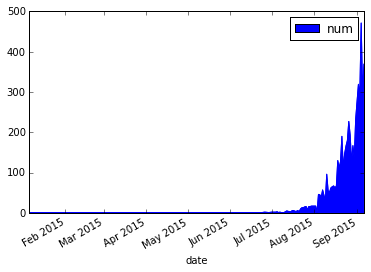

In [13]:
my_plot = cases_totals.plot(kind='area')

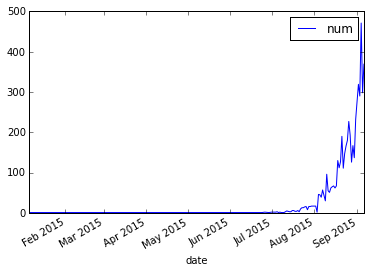

In [14]:
my_plot = cases_totals.plot()

We have observed the serious condition we have to face; however, the situation of the dengue fever is still not discussed. Stay tune, we will come back later. (Done)

In [15]:
#cases_totals = cases_group.sum()
#cases_totals.sort(columns='num').head()
cases_accum=cases_totals.sum()
cases_accum.tail()

num    5263
dtype: int64

If we want to look at the data by month, we can easily resample and sum it all up. You’ll notice I’m using ‘M’ as the period for resampling which means the data should be resampled on a month boundary.

In [16]:
cases_patterns = cases.set_index('date')
cases_patterns.head()

,num
date,
2015-01-06,1
2015-01-19,1
2015-05-21,1
2015-05-24,1
2015-06-04,1


In [17]:
cases_patterns.resample('M',how=sum)

,num
date,
2015-01-31,2
2015-02-28,NaN
2015-03-31,NaN
2015-04-30,NaN
2015-05-31,2
2015-06-30,11
2015-07-31,202
2015-08-31,3023
2015-09-30,2023


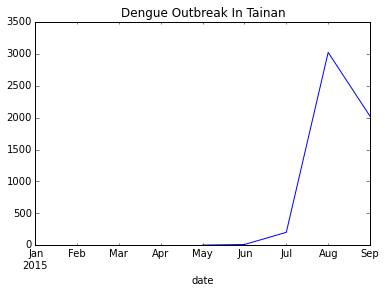

In [18]:
cases_plot = cases_patterns.resample('M',how=sum).plot(title="Dengue Outbreak In Tainan",legend=None)


As we have known: it is "outbreak", i.e. not enough data to motivate the situation. Resample the data in "week" to observate again

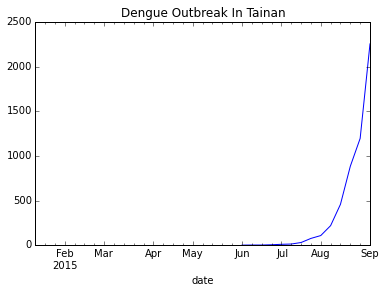

In [19]:
import numpy as np
cases_plot = (cases_patterns.resample('w',how=sum)).plot(title="Dengue Outbreak In Tainan",legend=None)

Question
---
Why is it called "outbreak"?

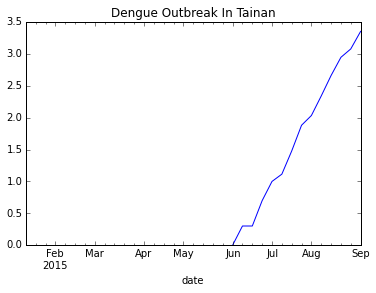

In [20]:
import numpy as np
cases_plot = np.log10(cases_patterns.resample('w',how=sum)).plot(title="Dengue Outbreak In Tainan",legend=None)

The data looks like a straight line if we plot it with the data scaled by $\log_{10}(\bullet)$!

Let us take some predictions by simple least square scheme.

In [21]:
df3=np.log10(cases_patterns.resample('w',how=sum))
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2015-01-11 to 2015-09-06
Freq: W-SUN
Data columns (total 1 columns):
num    17 non-null float64
dtypes: float64(1)
memory usage: 560.0 bytes


In [22]:
df3['ind']=np.arange(1,len(df3)+1)


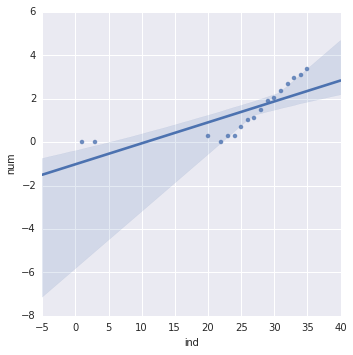

In [23]:
import seaborn as sns
sns.lmplot('ind','num', df3)

In [24]:
from pandas.stats.api import ols
ols(y=df3['num'],x=df3['ind'])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         17
Number of Degrees of Freedom:   2

R-squared:         0.6178
Adj R-squared:     0.5923

Rmse:              0.7549

F-stat (1, 15):    24.2422, p-value:     0.0002

Degrees of Freedom: model 1, resid 15

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0965     0.0196       4.92     0.0002     0.0581     0.1349
     intercept    -1.0195     0.5209      -1.96     0.0692    -2.0404     0.0015
---------------------------------End of Summary---------------------------------

The fitting is very worse cause of the former data. Let us remove these data and re-do the fitting.

In [25]:
df3

,num,ind
date,,
2015-01-11,0.000000,1
2015-01-18,NaN,2
2015-01-25,0.000000,3
2015-02-01,NaN,4
2015-02-08,NaN,5
2015-02-15,NaN,6
2015-02-22,NaN,7
2015-03-01,NaN,8
2015-03-08,NaN,9


Observe the data from 22nd element.

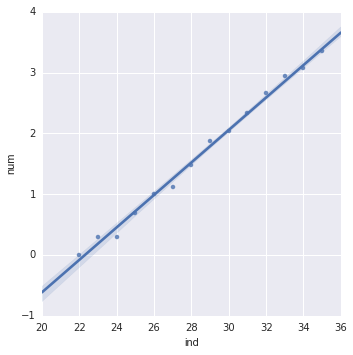

In [26]:
df4=df3[21:]
sns.lmplot('ind','num', df4)

See, the result is pretty good!

In [27]:
import statsmodels.formula.api as sm

ols = sm.OLS(df4['ind'].values, df4['num'].values)
ols.fit().summary()

/Users/chu-chinghuang/anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     59.33
Date:                Mon, 14 Sep 2015   Prob (F-statistic):           3.38e-06
Time:                        08:13:44   Log-Likelihood:                -54.889
No. Observations:                  14   AIC:                             111.8
Df Residuals:                      13   BIC:                             112.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            13.1860      1.712      7.703      0.000         9.488    16.884
==============================================================================
Omnibus:                        2.953   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                1.090
Skew:                          -0.032   Prob(JB):                        0.580
Kurtosis:                       1.634   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

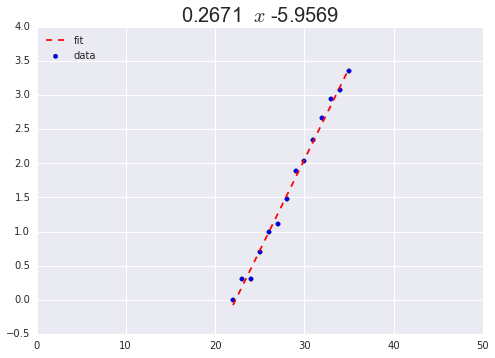

In [28]:
#df['log total deaths'] = log10(df['total deaths'].values)
import matplotlib.pyplot as plt
x=df4['ind']
ydata=df4['num']
a0,b0 = np.polyfit(x,ydata,1)
yfit = a0 * x + b0 
plt.scatter(x,ydata,label='data')
plt.plot(x,yfit,'r--',label='fit')
plt.title('%.4f  $x$ %.4f' % (a0,b0) , size=20 )
plt.xlim([0,50])
plt.legend(loc='upper left')

Final prediction
---

\begin{eqnarray}
\log_{10}y_{\text pred}&=&0.2671 x-5.9569 \\
y_{\text pred}&=& 10^{0.2671 x-5.9569}\\
              &=& 1.104\times10^{-6}\cdot 10^{0.2671x}
\end{eqnarray}
 


In [36]:
10**(-5.9569)

1.1043328726700492e-06

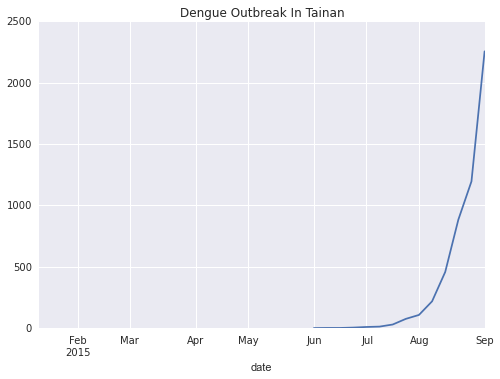

In [29]:
cases_plot = (cases_patterns.resample('w',how=sum)).plot(title="Dengue Outbreak In Tainan",legend=None)

In [30]:
df3['cases']=10**((df3['ind'])*0.2671-5.969)


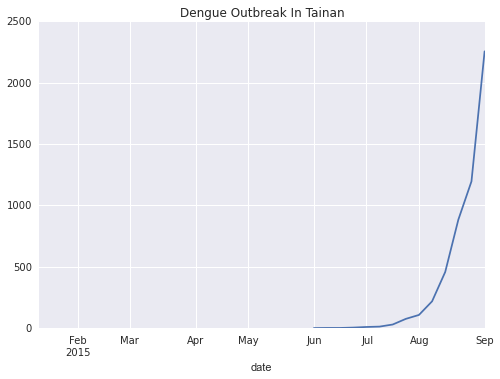

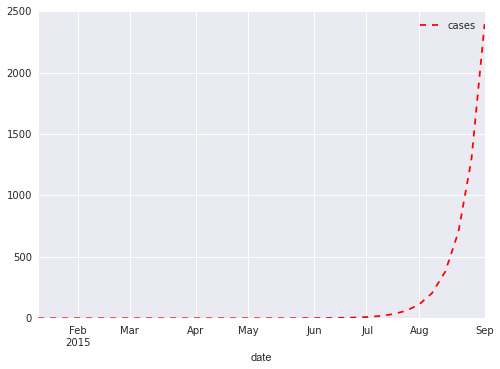

In [31]:
 (cases_patterns.resample('w',how=sum)).plot(title="Dengue Outbreak In Tainan",legend=None)
df3.plot(y='cases',color='red',style='--')

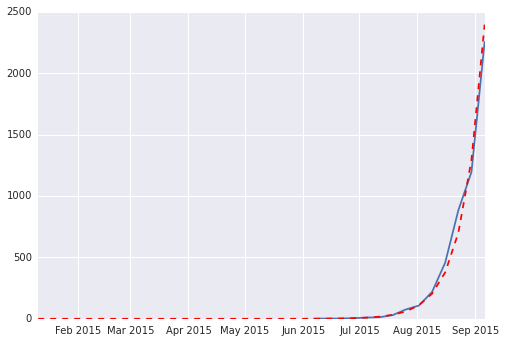

In [33]:
plt.plot(df3.index,cases_patterns.resample('w',how=sum),df3.index,df3['cases'],'r--')

Question
---
- How about the change of numbers of infected in the next future?
- Predict how many infected cases during the forcoming December would be.

Courage
---
Show me the dangerous courage that dengue has occupied

In [33]:
from numpy import genfromtxt
data_file = genfromtxt('data/0908.csv', delimiter=',')

date=data_file[1:,1]
lats=data_file[1:,5]
lons=data_file[1:,6]

In [25]:
lats[:5],lons[:5]

(array([ 22.987,  22.979,  22.997,  22.997,  23.005]),
 array([ 120.234,  120.197,  120.198,  120.198,  120.209]))

In [26]:
lats[:5],lons[:5]

(array([ 22.987,  22.979,  22.997,  22.997,  23.005]),
 array([ 120.234,  120.197,  120.198,  120.198,  120.209]))

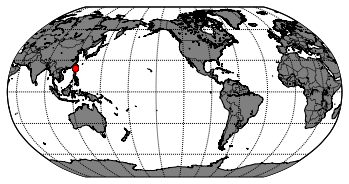

In [27]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
x,y = map(lons, lats)
map.plot(x, y, 'ro', markersize=6)

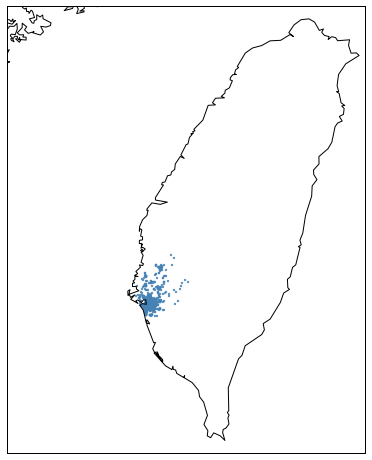

In [32]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8,8)) 
map = Basemap(projection='mill' , 
                              resolution='i' ,
                              llcrnrlon=119.0 , llcrnrlat=21.8,
                              urcrnrlon=122.05 , urcrnrlat=25.4,
                              lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()

map.scatter(lons, lats, latlon=True,
          s=2, marker='o',  color="steelblue", alpha=0.8); 

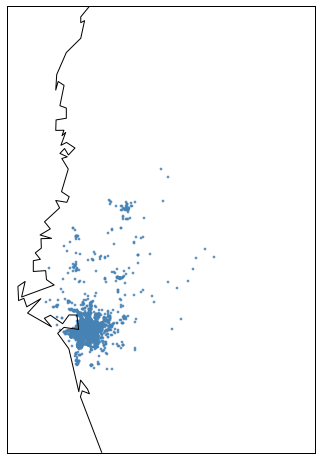

In [28]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8,8)) 
map = Basemap(projection='mill' , 
                              resolution='i' ,
                              llcrnrlon=120.0 , llcrnrlat=22.7,
                              urcrnrlon=120.8 , urcrnrlat=23.8,
                              lat_ts =20)
map.drawcoastlines()

map.drawmapboundary()

map.scatter(lons, lats, latlon=True,
          s=3, marker='o',  color="steelblue", alpha=0.8); 

In [4]:
from JSAnimation.IPython_display import display_animation
import matplotlib.pyplot as plt
from matplotlib import animation

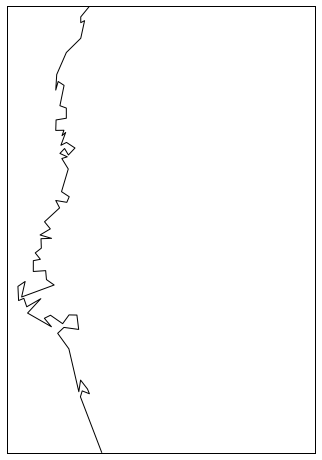

In [29]:
fig = plt.figure(figsize=(8,8)) 
map = Basemap(projection='mill' , 
                              resolution='i' ,
                              llcrnrlon=120.0 , llcrnrlat=22.7,
                              urcrnrlon=120.8 , urcrnrlat=23.8,
                              lat_ts =20)
map.drawcoastlines()

map.drawmapboundary()

In [26]:
len(np.isnan(lats[:-1])),len((lons[:-1]))

(5262, 5262)

In [30]:
Nframes = len(lons)

def animate(nf):
    m=map.scatter(lons[:nf+3], lats[:nf+3], latlon=True,s=3, marker='o',  color="steelblue", alpha=0.8); 
    return m

In [ ]:
anim = animation.FuncAnimation(fig, animate, frames=Nframes-3, interval=100)
display_animation(anim, default_mode='once')

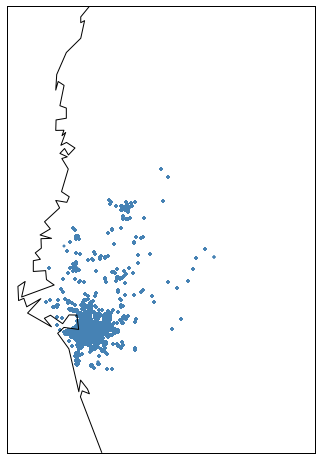

In [37]:
fig = plt.figure(figsize=(8,8)) 
map = Basemap(projection='mill' , 
                              resolution='i' ,
                              llcrnrlon=120.0 , llcrnrlat=22.7,
                              urcrnrlon=120.8 , urcrnrlat=23.8,
                              lat_ts =20)
map.drawcoastlines()

map.drawmapboundary()

for i in np.arange(len(lons)/10-1):
    map.scatter(lons[:3+10*i], lats[:3+i*10], latlon=True,
          s=3, marker='o',  color="steelblue", alpha=0.8); 
    plt.savefig("mapdata/base%05d.png" %i, dpi=75)

In [38]:
def html_movie(plotfiles, interval_ms=300, width=800, height=600,casename='movie'):
    import os
    if not isinstance(plotfiles, (tuple,list)):
        raise TypeError('html_movie: plotfiles=%s of wrong type %s' %
                        (str(plotfiles), type(plotfiles)))
    # Check that the plot files really exist
    missing_files = [fname for fname in plotfiles if not os.path.isfile(fname)]
    if missing_files:
        raise ValueError('Missing plot files: %s' % str(missing_files)[1:-1])

    ext = os.path.splitext(plotfiles[0])[-1]
    if ext == '.png' or ext == '.jpg' or ext == '.jpeg' or ext == 'gif':
        pass
    else:
        raise ValueError('Plotfiles (%s, ...) must be PNG files with '\
                         'extension .png' % plotfiles[0])
        
    header = """\
<html>
<head>
    <meta charset="utf-8" />
    <meta name="viewport" content="width=device-width" />
</head>
<style type="text/css">
    body { 
       margin: 10; 
       padding: 10
     }
    input{
       font-family:  Georgia, serif;
       font-size: 1em; /* 20px / 10px */
       color: #000 ;
       background-color: #ffb200 ;    
       border: 2px outset #b37d00 ;
       border-radius: 10px;
       width: 60px ;
       text-decoration: none ;
       background-color: #9cf ;
       border-top: 1px solid #c0ffff ;
       border-right: 1px solid #00f ;
       border-bottom: 1px solid #00f ;
       border-left: 1px solid #c0ffff ;
    }
    .push-down{
       border: 1px solid #38538c;
       background-color: #9cf;
       //color: #FFFFFF;
       text-shadow: 0px -1px 1px #213052;
       box-shadow: inset 0 1px 10px 1px #5D88E3, 0px 1px 0 #1C2C4D, 0 6px 0px #1D3054, 0px 10px 25px rgba(0,0,0,.7);
    }
    .push-down:hover{
       background: transparent;
       box-shadow: inset 0 0px 20px 1px #88ADFC, 0px 1px 0 #1C2C4D, 0 6px 0px #1D3054, 0px 10px 25px rgba(0,0,0,.7);
    }
    .push-down:active{
       box-shadow: inset 0 1px 10px 1px #5B89EB, 0 1px 0 #1A2847, 0 2px 0 #1C2D4D, 0px 3px 6px rgba(0,0,0,.9);
       margin-top: 10px;
    } 
</style> 
<body>
<div align="center">
"""
    no_images = len(plotfiles)
    jscode = """
<script language="Javascript">
<!---
var num_images_%(casename)s = %(no_images)d;
var img_width = %(width)d;
var img_height = %(height)d;
var interval = %(interval_ms)d;
var images_%(casename)s = new Array();

function preload_images_%(casename)s()
{
   t = document.getElementById("progress");
""" % vars()

    i = 0
    for fname in plotfiles:
        jscode += """
   t.innerHTML = "Preloading image ";
   images_%(casename)s[%(i)s] = new Image(img_width, img_height);
   images_%(casename)s[%(i)s].src = "%(fname)s";
        """ % vars()
        i = i+1
    jscode += """
   t.innerHTML = "";
}

function tick_%(casename)s()
{
   if (frame_%(casename)s > num_images_%(casename)s - 1)
       frame_%(casename)s = 0;

   document.movie.src = images_%(casename)s[frame_%(casename)s].src;
   frame_%(casename)s += 1;
   tt = setTimeout("tick_%(casename)s()", interval);
}

function startup_tmpmovie()
{
   preload_images_%(casename)s();
   frame_%(casename)s = 0;
   setTimeout("tick_%(casename)s()", interval);
}

function stopit()
{ clearTimeout(tt); }

function restart_tmpmovie()
{ tt = setTimeout("tick_%(casename)s()", interval); }

function slower()
{ interval = interval/0.7; }

function faster()
{ interval = interval*0.7; }

// --->
</script>
""" % vars()
    plotfile0 = plotfiles[0]
    form = """
<form>
&nbsp;
<input type="button" class="push-down" value="Play" onClick="startup_tmpmovie()">
<input type="button" class="push-down" value="Pause" onClick="stopit()">
<input type="button" class="push-down" value="Replay" onClick="restart_tmpmovie()">
&nbsp;
<input type="button" class="push-down" value="Slower" onClick="slower()">
<input type="button" class="push-down" value="Faster" onClick="faster()">
</form>

<p><div ID="progress"></div></p>
<img src="%(plotfile0)s" name="movie" border=2/></div>
""" % vars()
    footer = '\n</body>\n</html>\n'
    #print(footer)
    return header, jscode, form, footer

In [39]:
def movieHTML(files, interval_ms=300, width=800, height=600,output='movie'):
    import os,glob,re
    #if not isinstance(plotfiles, (tuple,list)):
    #    raise TypeError('html_movie: plotfiles=%s of wrong type %s' %
    #                    (str(plotfiles), type(plotfiles)))
    # Check that the plot files really exist
    #missing_files = [fname for fname in plotfiles if not os.path.isfile(fname)]
    #if missing_files:
    #    raise ValueError('Missing plot files: %s' % str(missing_files)[1:-1])
    #
    # Don't make movie file, just an html file that can play png files
    #files = self._prop['input_files']
    if isinstance(files, str):
       files = glob.glob(files)
       files.sort()
    #print '\nMaking HTML code for displaying', ', '.join(files)
    fps = 25;
    interval_ms = 1000.0/fps
    #outf = self._prop['output_file']
    
    if output is None:
       output = 'test'
       
    #html_movie(files, interval_ms, casename=casename)   
    
    
    header, jscode, form, footer = html_movie(files, interval_ms, casename=output)
    casename = os.path.splitext(output)[0] + '.html'
    print(casename)
    f = open(casename, 'w')
    f.write(header + jscode + form + footer)
    f.close()

In [40]:
movieHTML("mapdata/base*.png")

movie.html


In [43]:
from IPython.core.display import HTML
filename="movie.html"
HTML('<div align="center"><iframe src=%s width=700, height=500></iframe></div>' %filename)

In [34]:
%%bash 
ipython nbconvert maps.ipynb

[NbConvertApp] Converting notebook maps.ipynb to html
[NbConvertApp] Writing 657898 bytes to maps.html
